In [1]:
!python --version

Python 3.7.12


**Julien VALENTIN**, **Décembre 2021**

# Jeu de données **Iris**

## Téléchargement du jeu de données

Le jeu de données est préformaté dans le package *Scikit-learn*, dans le sous-module *datasets*. La fonction `load_iris()` est implémentée et renvoie un objet `sklearn.utils.Bunch`, qui a en fait des attributs de dictionnaire. On importe le module en question.

In [2]:
from sklearn.datasets import load_iris

On appelle la fonction permettant de charger le jeu de données.

In [3]:
iris = load_iris()

## Exploration de l'objet `iris`

Vérifions le type de l'objet `iris`.

In [4]:
type(iris)

sklearn.utils.Bunch

Les différentes clefs sont les suivantes.

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Les deux premières clés sont celles que nous utiliserons : `iris.data` contient les *observations* et `iris.target` la *variable à expliquer* pour chaque observation. On regarde d'abord le nom de fichier : c'est un fichier `.csv`, pour *comma separated value*, un format usuel pour le stockage de données.

In [6]:
iris.filename

'iris.csv'

Avant de sélectionner un modèle de prédiction, on étudie la catégorie des observations, et celle du caractère à expliquer.

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Les entrées sont manifestement des grandeurs numériques, plus précisément des nombres réels.

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

La sortie est donc un objet catégoriel, et même non-ordonné. Nous sommes donc face à un problème de classification. Chargeons les données dans une variable `X` et les classes associées `Y`. 

In [9]:
X = iris.data
Y = iris.target

On peut regarder le nombre d'observations.

In [10]:
X.shape

(150, 4)

In [11]:
Y.shape

(150,)

## Visualisation des données

### Première étape avec *Matplotlib*

In [12]:
from matplotlib import pyplot
pyplot.style.use("ggplot")

Une première chose à visualiser est le nuage de points, dans le plan, des paires de caractères. Prenons par exemple le nuage de points formé des longueurs et hauteurs du sépale. Pour commencer, on trie, par espèce, les données.

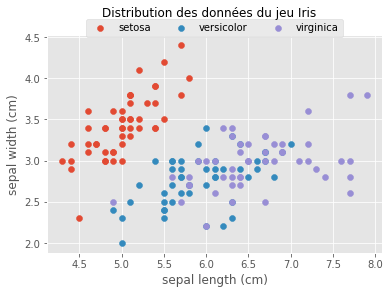

In [13]:
for indice, nom in enumerate(iris.target_names):
    x = X[Y == indice]
    pyplot.scatter(x[:, 0], x[:, 1], label=nom)

pyplot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
pyplot.suptitle("Distribution des données du jeu Iris")
pyplot.xlabel(iris.feature_names[0])
pyplot.ylabel(iris.feature_names[1])
pyplot.show()

On n'a *a priori* pas de corrélation claire en l'appartenance à une espèce `versicolor` ou `virginica` en fonction de ces deux caractères. Seule l'espèce `setosa` est séparée. Quid des caractères portant sur le pétale ?

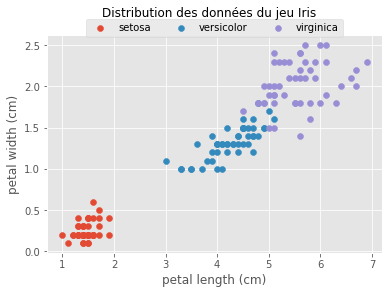

In [14]:
for indice, nom in enumerate(iris.target_names):
    x = X[Y == indice]
    pyplot.scatter(x[:, 2], x[:, 3], label=nom)

pyplot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
pyplot.suptitle("Distribution des données du jeu Iris")
pyplot.xlabel(iris.feature_names[2])
pyplot.ylabel(iris.feature_names[3])
pyplot.show()

On voit que les espèces sont bien mieux expliquées par cette paire de caractères, bien qu'il n'y ait à nouveau pas de frontière claire entre les deux espèces bleue et violette.

### Avec le couple *Pandas* et *Seaborn*

On commence par déclarer une instance de l'objet `DataFrame` proposé par la librairie *Pandas*.

In [15]:
import pandas

In [16]:
dataset = pandas.DataFrame(X, columns=iris.feature_names)

On visualise un extrait de données, dont on choisit la taille de l'échantillon

In [17]:
dataset.tail(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


ou encore

In [18]:
dataset.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


On peut également donner un aperçu de statistiques élémentaires des caractères numériques.

In [19]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


On s'intéresse en général plutôt aux valeurs manquantes et aux informations sur les types, leur compte...

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Il manque en fait une colonne ! C'est bien sûr la variable à expliquer elle-même. Elle fait partie, dans le cadre d'un apprentissage supervisé, des observations.

In [21]:
dataset['species'] = Y

Voyons maintenant un aperçu d'une figure usuelle en traitement de données. Importons *Seaborn* et utilisons `pairplot`.

In [22]:
import seaborn
seaborn.set_theme(style="ticks")

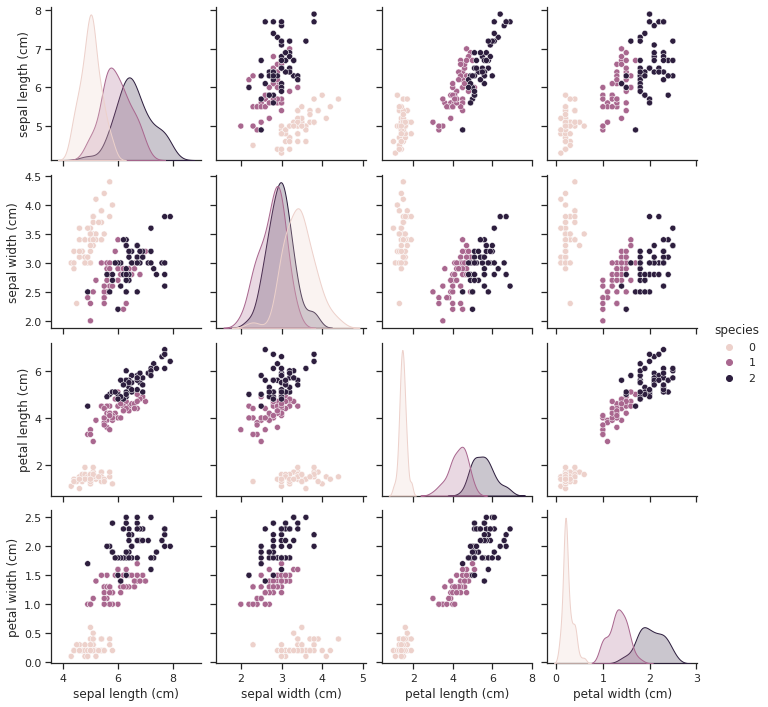

In [23]:
seaborn.pairplot(dataset, hue="species");

On remarque que le graphe est très riche. On obtient du même coup les graphes des couples d'observations et en plus les distributions des échantillons par caractère. Cette représentation est très pratique pour les jeux contenant peu de caractères. Du même coup, on l'avait vu dans la description statistique, on confirme que, si les distributions ont des graphes proches de lois normales, on note déjà à l'oeil qu'elles ne sont ni centrées ni réduites. Les statistiques numériques commencent par là !

## Mise à l'échelle des jeux de données

### *Scaling* de l'objet `sklearn.utils.Bunch`

La librairie *Scikit-learn* comprend un sous-module permettant la mise à l'échelle. Il s'agit d'une transformation linéaire dépendant du jeu de données (`fit`), puis d'être appliquée au jeu de données, `transform`. L'entraînement et l'application se fait au même objet `X`, d'où la syntaxe.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *Scaling* de l'objet `DataFrame`

On utilise le même outil `scaler`, seulement il s'applique à des objets `ndarray` de la librairie *Numpy*. Il faut donc faire un aller-retour par une instance de cet objet.

In [25]:
dataset_scaled = scaler.fit_transform(dataset.to_numpy())
dataset_scaled = pandas.DataFrame(dataset_scaled, columns=iris.feature_names+['species'])

Vérifions l'impact de notre transformation

In [26]:
dataset_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16,1.184238e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,-1.224745e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,-1.224745e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,0.000000e+00
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,1.224745e+00
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,1.224745e+00


ou encore

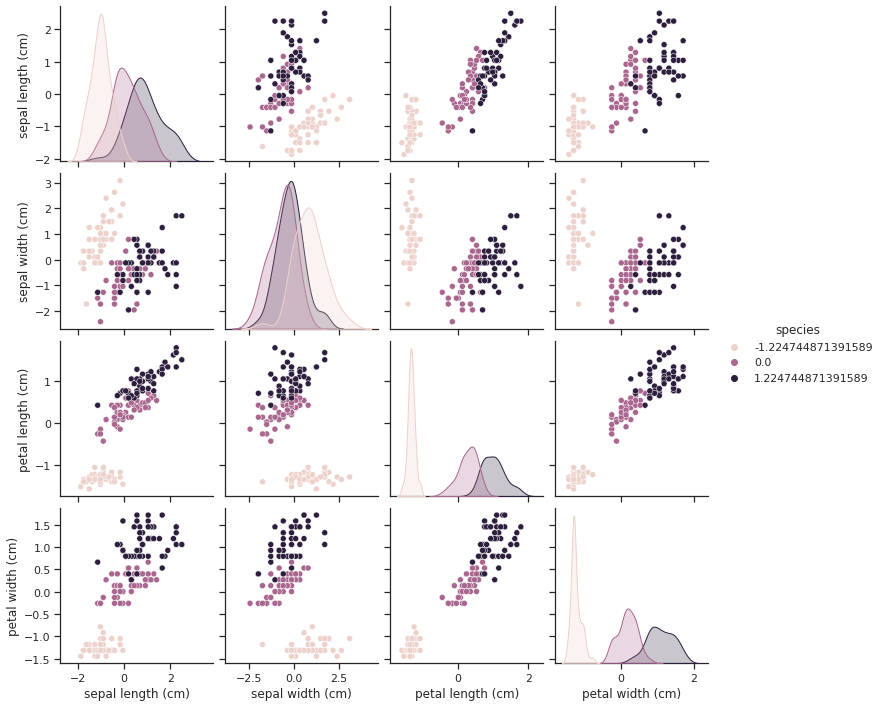

In [27]:
seaborn.pairplot(dataset_scaled, hue="species");

## Définition des jeux d'entraînements et de test

L'étape suivante se fait en séparant le jeu de données en deux sous-jeux : une série servant à l'entraînement du modèle de prédiction, série sur laquelle l'erreur de prédiction est supposée tendre vers 0, et une série servant au test de l'apprentissage, c'est celui-ci qui permettra d'évaluer la qualité de l'entraînement à l'aide d'une métrique qu'on choisira plus tard.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

## Création des réseaux de neurones

### Avec *Scikit-learn*

### Avec *Pytorch*

On commence par importer les objets nécessaires à la définition du réseau de neurones.

In [29]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

On déclare maintenant un objet représentant un réseau de neurones. Il étend le contexte `nn.Module`, on commence par initialiser sa classe mère et on déclare ensuite trois couches de neurones : une première, linéaire, de quatre entrées (c'est le nombre de caractères) et de cinquante sorties ; la deuxième est composée de cinquante entrées et cinquante sorties. Enfin, la troisième décrit le neurone de sortie, aux cinquante paramètres donnés par la sortie de la deuxième couche, on associe une sortie du réseau qui est un vecteur de trois valeurs.

On définit ensuite une étape de l'entraînement, ici `forward`. Il s'agit de définir les fonctions d'activation des neurones. On a donc deux couches linéaires et une dernière, non-linéaire, connue sous le nom de `softmax`.

Ensuite, on déclare l'opérateur d'optimisation et enfin la fonction de coût, une métrique permettant d'évaluer la performance de la prédiction avant d'appliquer la rétro-propagation de l'erreur.

In [30]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

modelPT   = Model(X_train.shape[1])
optimizer = torch.optim.Adam(modelPT.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
modelPT

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

Voilà notre modèle prêt à être entraîné !

### Avec *TensorFlow* v.2 (et *Keras*)

On commence par importer les fonctions et librairies dont nous aurons besoin, globalement *Tensorflow* et plus précisément quelques objets et fonctions organisées dans l'arborescence de *Keras*, sous-module de *Tensorflow*.

In [31]:
import tensorflow
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

On implémente le modèle : un objet `Sequential` auquel on ajoute dans un second temps les couches de neurones.

In [32]:
modelTF = Sequential()
modelTF.add(Dense(50, input_shape=(4,), activation='relu'))
modelTF.add(Dense(50, activation='relu'))
modelTF.add(Dense(3, activation='softmax'))

On compile le modèle !

In [33]:
modelTF.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entraînement du réseau de neurones

### Entraînement du réseau *PyTorch*

On importe le module `tqdm`. Il n'a rien à voir avec le problème qui nous occupe, il permet simplement d'obtenir une barre de progression pour suivre le déroulement de l'algorithme.

In [34]:
import tqdm

Passons maintenant à l'entraînement proprement dit.

In [35]:
import numpy

EPOCHS  = 100
X_trainPT = Variable(torch.from_numpy(X_train)).float()
y_trainPT = Variable(torch.from_numpy(y_train)).long()
X_testPT  = Variable(torch.from_numpy(X_test)).float()
y_testPT  = Variable(torch.from_numpy(y_test)).long()

loss_listPT     = numpy.zeros((EPOCHS,))
accuracy_listPT = numpy.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_predPT = modelPT(X_trainPT)
    lossPT = loss_fn(y_predPT, y_trainPT)
    loss_listPT[epoch] = lossPT.item()
    
    # Zero gradients
    optimizer.zero_grad()
    lossPT.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_predPT = modelPT(X_testPT)
        correctPT = (torch.argmax(y_predPT, dim=1) == y_testPT).type(torch.FloatTensor)
        accuracy_listPT[epoch] = correctPT.mean()

100%|██████████| 100/100 [00:00<00:00, 399.72it/s]


On peut visualiser l'évolution de l'erreur en fonction du

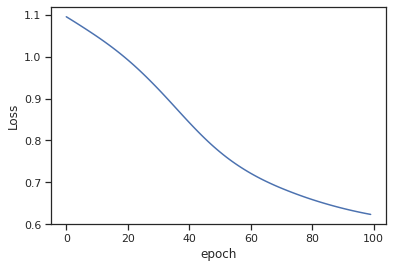

In [36]:
pyplot.plot(range(EPOCHS), loss_listPT)
pyplot.ylabel('Loss')
pyplot.xlabel('epoch');

### Entraînement du réseau *Tensorflow*

Avant l'entraînement, on se doit de convertir nos données de sorties en classes catégorielles.

In [37]:
y_trainTF = to_categorical(y_train, 3)
y_testTF = to_categorical(y_test, 3)

Entraînons donc !

In [38]:
tensorflow.config.run_functions_eagerly(True)

history = modelTF.fit(X_train, y_trainTF, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


2/2 [==============================] - 0s 83ms/step - loss: 1.0875 - accuracy: 0.4271 - val_loss: 1.0026 - val_accuracy: 0.4583
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 1.0407 - accuracy: 0.5000 - val_loss: 0.9545 - val_accuracy: 0.5833
Epoch 3/100
2/2 [==============================] - 0s 58ms/step - loss: 0.9981 - accuracy: 0.5208 - val_loss: 0.9091 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 60ms/step - loss: 0.9558 - accuracy: 0.6979 - val_loss: 0.8673 - val_accuracy: 0.7917
Epoch 5/100
2/2 [==============================] - 0s 55ms/step - loss: 0.9178 - accuracy: 0.7917 - val_loss: 0.8283 - val_accuracy: 0.7917
Epoch 6/100
2/2 [==============================] - 0s 65ms/step - loss: 0.8815 - accuracy: 0.8125 - val_loss: 0.7920 - val_accuracy: 0.7917
Epoch 7/100
2/2 [==============================] - 0s 59ms/step - loss: 0.8470 - accuracy: 0.8125 - val_loss: 0.7577 - val_accuracy: 0.7917
Epoch 8/100
2/2 [===============

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

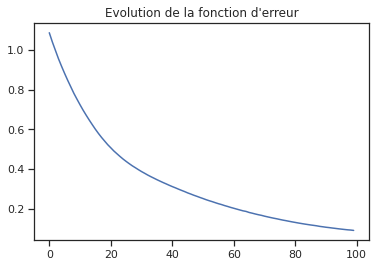

In [40]:
pyplot.plot(range(100), history.history['loss'])
pyplot.title("Evolution de la fonction d'erreur")
pyplot.show()

## Validation du modèle

### Validation du réseau de *Pytorch*

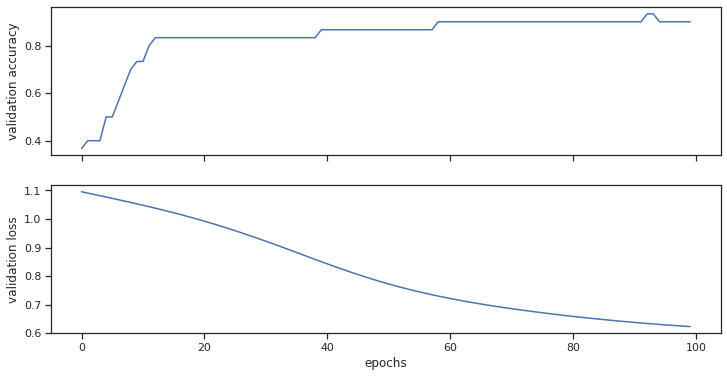

In [41]:
fig, (ax1, ax2) = pyplot.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_listPT)
ax1.set_ylabel("validation accuracy")

ax2.plot(loss_listPT)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

### Validation du réseau *Tensorflow*

In [42]:
tensorflow.data.experimental.enable_debug_mode()

test_results = modelTF.evaluate(X_test, y_testTF, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

1/1 [==============================] - 0s 44ms/step - loss: 0.1984 - accuracy: 0.9333
Test results - Loss: 0.19840885698795319 - Accuracy: 0.9333333373069763%


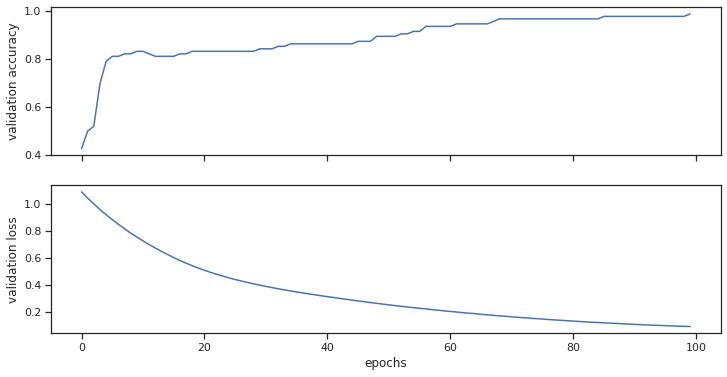

In [43]:
fig, (ax1, ax2) = pyplot.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(history.history['accuracy'])
ax1.set_ylabel("validation accuracy")

ax2.plot(history.history['loss'])
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");